<a href="https://colab.research.google.com/github/FabiBarbos/Churn/blob/main/Segmentacao_cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
# Importando as bibliotecas
import pandas as pd # Para utilização de dataframe
import matplotlib.pyplot as plt # Para gerar os gráficos
import seaborn as sns # Para gerar gráficos
import datetime as dt # Para facilitar a manipulação de dados com datas
import numpy as np

pd.options.mode.chained_assignment = None

In [134]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
import squarify # para Treemap Visualization

In [100]:
# Importando os dados do dataset 
df = pd.read_excel("segmentacao.xlsx")

In [101]:
# Analisando os primeiros dados do dataset
df.head()

,order_id,quantity,Venda,Empresa_que_compra,data_compra
0,11077,4,31.000,Rattlesnake Canyon Grocery,1998-05-06
1,11077,3,35.280,Rattlesnake Canyon Grocery,1998-05-06
2,11077,2,29.700,Rattlesnake Canyon Grocery,1998-05-06
3,11077,2,64.505,Rattlesnake Canyon Grocery,1998-05-06
4,11077,2,33.853,Rattlesnake Canyon Grocery,1998-05-06


In [102]:
# Verificando a existência de dados em branco ou nulos
print( df.isnull().any() )

order_id              False
quantity              False
Venda                 False
Empresa_que_compra    False
data_compra           False
dtype: bool


In [103]:
# Quantificando quantos registros em branco existem em cada dimensão
print (df.isnull().sum())

order_id              0
quantity              0
Venda                 0
Empresa_que_compra    0
data_compra           0
dtype: int64


**RFM (Recency, Frequency, Monetary)**

  

*   **Recency**: calcula o número de dias entre o dia base (última compra + 1) e a última compra por cada empresa.
*   **Frequency**: calcula o número de compras realizadas por cada empresa.
*   **Monetary**: calcula o valor total pago por cada empresa.

In [104]:
# Realizando operações de conversão e obtenção dos valores extremos da dimensão data
df['data_compra'] = pd.to_datetime(df['data_compra']) # Converte o campo para o tipo data

In [105]:
df.head()

,order_id,quantity,Venda,Empresa_que_compra,data_compra
0,11077,4,31.000,Rattlesnake Canyon Grocery,1998-05-06
1,11077,3,35.280,Rattlesnake Canyon Grocery,1998-05-06
2,11077,2,29.700,Rattlesnake Canyon Grocery,1998-05-06
3,11077,2,64.505,Rattlesnake Canyon Grocery,1998-05-06
4,11077,2,33.853,Rattlesnake Canyon Grocery,1998-05-06


In [106]:
menor_data, maior_data = df['data_compra'].min(), df['data_compra'].max() # Obter o dia da primeira e da última compra.
maior_data = maior_data + pd.DateOffset(days=1) # Adicionar um dia à maior compra para iniciar a análise.


In [107]:
# Obter as dez maiores vendas
df.groupby('data_compra')[['Venda']].sum().sort_values('Venda', ascending=False)[:10] 

,Venda
data_compra,
1998-04-17,27143.8500
1998-01-06,19399.2950
1998-03-27,17792.9000
1998-02-02,17110.6500
1998-02-18,14634.6100
1998-02-16,12845.1000
1997-05-19,12138.2200
1997-01-16,11908.4000
1998-02-19,11585.7400


In [108]:
# Dividir em 4 períodos para análise
periodoA, periodoB, periodoC, periodoD = pd.date_range(menor_data, maior_data, periods=4)

In [109]:
tabela_rfm = df.groupby('Empresa_que_compra').agg({'data_compra': lambda date: (maior_data - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'Venda': lambda valor: valor.sum()})
tabela_rfm.head(6).sort_values('Venda', ascending=False)

,data_compra,order_id,Venda
Empresa_que_compra,,,
Berglunds snabbköp,64,52,24927.5775
Around the Horn,27,30,13390.6500
Antonio Moreno Taquería,99,17,7023.9775
B's Beverages,23,22,6089.9000
Alfreds Futterkiste,28,12,4273.0000
Ana Trujillo Emparedados y helados,64,10,1402.9500


In [110]:
# Renomear as colunas de acordo com a análise de RFM
tabela_rfm.columns=['recency','frequency','monetary']

# Visualizar as empresas que mais compraram na Northwind
tabela_rfm.head().sort_values('frequency', ascending=False)

,recency,frequency,monetary
Empresa_que_compra,,,
Around the Horn,27,30,13390.6500
B's Beverages,23,22,6089.9000
Antonio Moreno Taquería,99,17,7023.9775
Alfreds Futterkiste,28,12,4273.0000
Ana Trujillo Emparedados y helados,64,10,1402.9500


In [111]:
# Classificando os dados de acordo com quartis 
tabela_rfm['R'] = pd.qcut(tabela_rfm['recency'], 4, ['1','2','3','4']) # mais recente, mais importante
tabela_rfm['F'] = pd.qcut(tabela_rfm['frequency'], 4, ['4','3','2','1']) # menos frequencia, menos importante
tabela_rfm['M'] = pd.qcut(tabela_rfm['monetary'], 4, ['4','3','2','1']) # menos consumo, menos importante

In [112]:
# Visualizando o resultado
tabela_rfm.head()



,recency,frequency,monetary,R,F,M
Empresa_que_compra,,,,,,
Alfreds Futterkiste,28,12,4273.0000,3,3,3
Ana Trujillo Emparedados y helados,64,10,1402.9500,4,4,4
Antonio Moreno Taquería,99,17,7023.9775,4,3,3
Around the Horn,27,30,13390.6500,3,2,2
B's Beverages,23,22,6089.9000,2,2,3


In [113]:
tabela_rfm['RFM_Segmento'] = tabela_rfm.R.astype(str) + tabela_rfm.F.astype(str) + tabela_rfm.M.astype(str)
tabela_rfm.head()

,recency,frequency,monetary,R,F,M,RFM_Segmento
Empresa_que_compra,,,,,,,
Alfreds Futterkiste,28,12,4273.0000,3,3,3,333
Ana Trujillo Emparedados y helados,64,10,1402.9500,4,4,4,444
Antonio Moreno Taquería,99,17,7023.9775,4,3,3,433
Around the Horn,27,30,13390.6500,3,2,2,322
B's Beverages,23,22,6089.9000,2,2,3,223


In [114]:
# Contar o número de segmentos
tabela_rfm_count_unique = tabela_rfm.groupby('RFM_Segmento')['RFM_Segmento'].nunique()
print(tabela_rfm_count_unique.sum())

35


In [119]:
# writing para Excel
datatoexcel = pd.ExcelWriter('RFM.xlsx')
  
# write DataFrame para excel
tabela_rfm.to_excel(datatoexcel)
  
# salvar o excel
datatoexcel.save()

In [120]:
# Importando os dados do dataset 
df_RFM = pd.read_excel("RFM.xlsx")

In [121]:
# Analisando os primeiros dados do dataset
df_RFM.head()

,Empresa_que_compra,recency,frequency,monetary,R,F,M,RFM_Segmento,RFM_Score
0,Alfreds Futterkiste,28,12,4273.0000,3,3,3,333,9
1,Ana Trujillo Emparedados y helados,64,10,1402.9500,4,4,4,444,12
2,Antonio Moreno Taquería,99,17,7023.9775,4,3,3,433,10
3,Around the Horn,27,30,13390.6500,3,2,2,322,7
4,B's Beverages,23,22,6089.9000,2,2,3,223,7


In [126]:
# Definir uma função rfm_level 
def rfm_level(df_RFM):
    if df_RFM['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df_RFM['RFM_Score'] >= 8) and (df_RFM['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df_RFM['RFM_Score'] >= 7) and (df_RFM['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df_RFM['RFM_Score'] >= 6) and (df_RFM['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df_RFM['RFM_Score'] >= 5) and (df_RFM['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df_RFM['RFM_Score'] >= 4) and (df_RFM['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [128]:
# Criar uma nova variável (coluna) RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level,axis=1)

In [129]:
# Analisando os primeiros dados do dataset
df_RFM.head()

,Empresa_que_compra,recency,frequency,monetary,R,F,M,RFM_Segmento,RFM_Score,RFM_Level
0,Alfreds Futterkiste,28,12,4273.0000,3,3,3,333,9,Can't Loose Them
1,Ana Trujillo Emparedados y helados,64,10,1402.9500,4,4,4,444,12,Can't Loose Them
2,Antonio Moreno Taquería,99,17,7023.9775,4,3,3,433,10,Can't Loose Them
3,Around the Horn,27,30,13390.6500,3,2,2,322,7,Loyal
4,B's Beverages,23,22,6089.9000,2,2,3,223,7,Loyal


In [130]:
# Calcular o valor médio de cada RFM_Level e retornar o tamanho de cada segmento
df_RFM_level_agg = df_RFM.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)

# Print o dataset agregado
print(df_RFM_level_agg)

                   recency frequency monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them      91.2      10.9   3323.2    38
Champions             39.4      18.4   7559.3     9
Loyal                 38.1      23.3  10527.3     7
Needs Attention       11.4      40.2  33601.4     9
Potential             35.6      27.9  14805.1    10
Promising             13.7      31.4  17133.5     7
Require Activation     4.1      61.3  47487.7     9


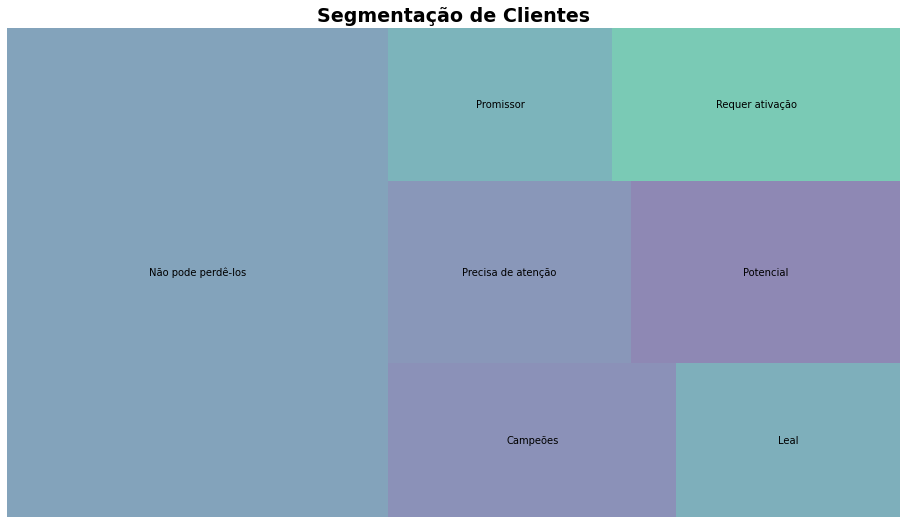

In [143]:
# Criar figura de segmentação de clientes = empresas
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=df_RFM_level_agg['count'], 
              label=['Não pode perdê-los',
                     'Campeões',
                     'Leal',
                     'Precisa de atenção',
                     'Potencial', 
                     'Promissor', 
                     'Requer ativação'], alpha=.6 )
plt.title("Segmentação de Clientes",fontsize=19,fontweight="bold")
plt.axis('off')
plt.show()